### 1. Data Load

In [14]:
import pandas as pd

housing = pd.read_csv('housing.csv')
housing.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


col: longitude


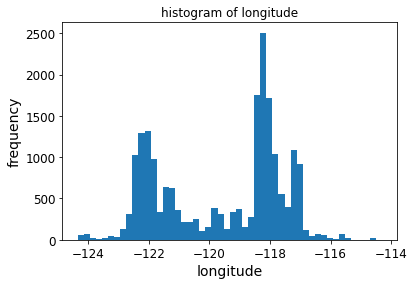

col: latitude


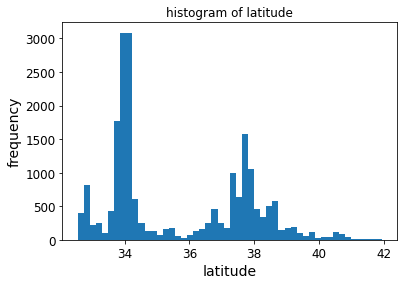

col: housing_median_age


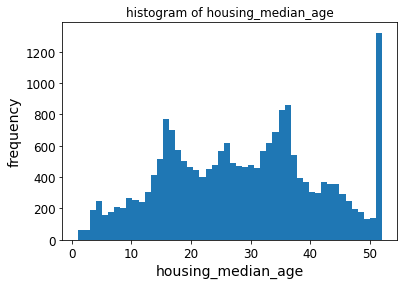

col: total_rooms


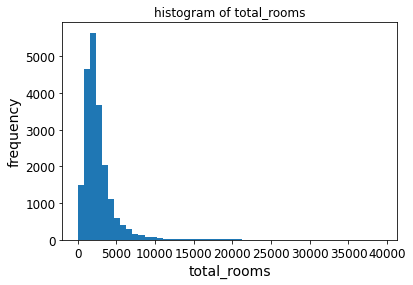

col: total_bedrooms


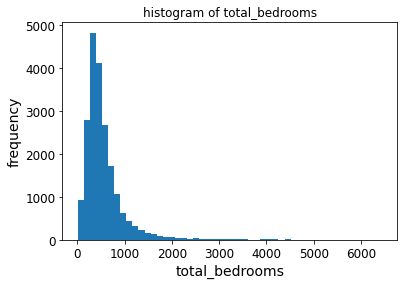

col: population


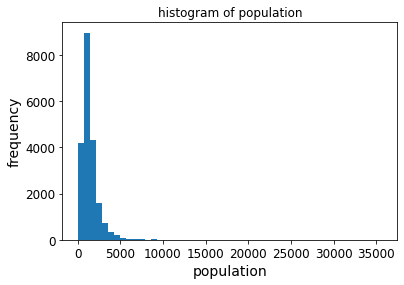

col: households


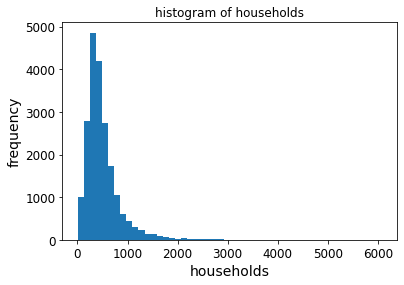

col: median_income


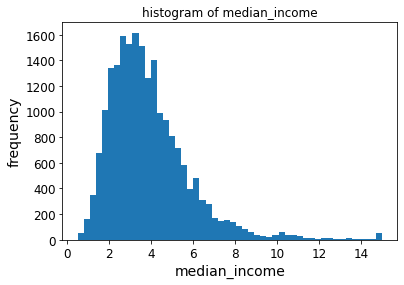

col: median_house_value


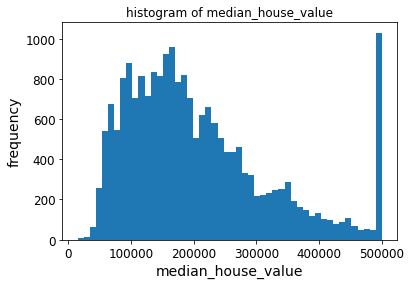

In [15]:
import matplotlib
import matplotlib.pyplot as plt

def plot_histogram(df):
    bins = 50
    col_list = list(housing)
    col_list.remove('ocean_proximity') # text type
    for col in col_list:
        print(f"col: {col}")
        hist = plt.hist(housing[col], bins=bins)
        plt.title(f"histogram of {col}")
        plt.xlabel(col)
        plt.ylabel("frequency")
        plt.show()

plot_histogram(housing)

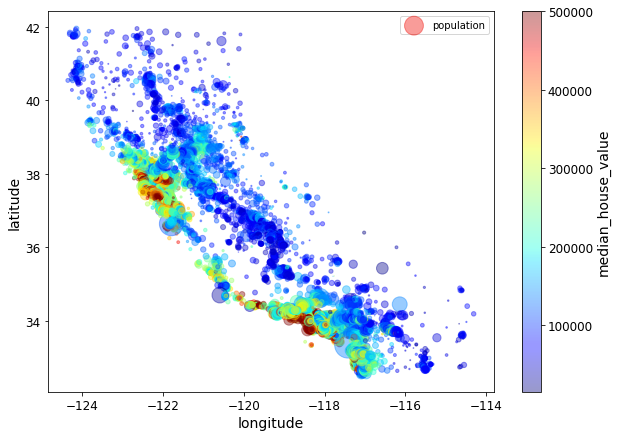

In [16]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
    s=housing['population']/50, label="population", figsize=(10, 7),
    c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)

plt.legend()

array([[<AxesSubplot:xlabel='median_house_value', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_house_value'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='median_income'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_income'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_income'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_income'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='median_income', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='total_rooms'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='median_incom

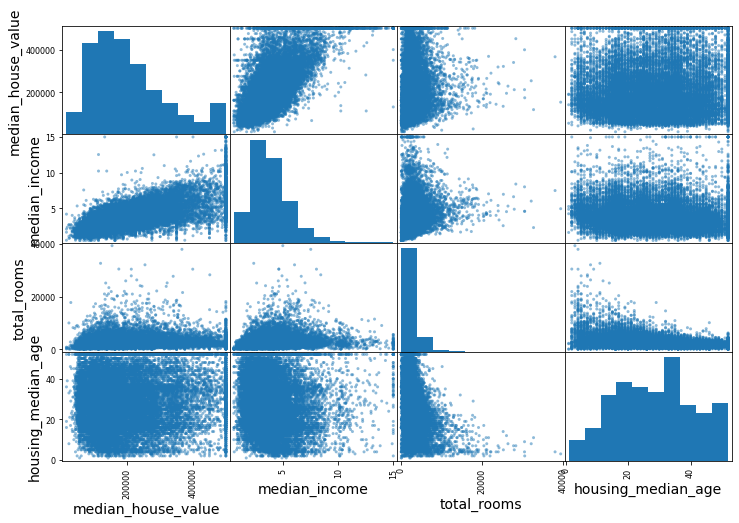

In [17]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

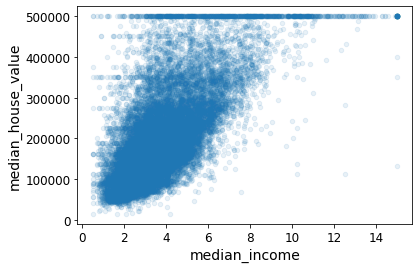

In [18]:
housing.plot(kind="scatter", x="median_income", y="median_house_value",
             alpha=0.1)

In [19]:
# check a structure of the data
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [20]:
# correlation between the median_house_value and other features
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

### 2. Prepare Data

In [21]:
# replace the empty values with the median
median = housing["total_bedrooms"].median()
housing["total_bedrooms"] = housing["total_bedrooms"].fillna(median)
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [22]:
# Attributes combinations
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
del housing["total_rooms"], housing["total_bedrooms"]

housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   longitude            20640 non-null  float64
 1   latitude             20640 non-null  float64
 2   housing_median_age   20640 non-null  float64
 3   population           20640 non-null  float64
 4   households           20640 non-null  float64
 5   median_income        20640 non-null  float64
 6   median_house_value   20640 non-null  float64
 7   ocean_proximity      20640 non-null  object 
 8   rooms_per_household  20640 non-null  float64
 9   bedrooms_per_room    20640 non-null  float64
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [23]:
# featurn standardization
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# delete columns of text type and target variable
col_list = list(housing)
col_list.remove('ocean_proximity') # text type
col_list.remove('median_house_value') # target variable needs not to be scaled

# generate a new dataframe that consist of numerical types only
housing_numeric = housing[col_list]
housing_scaled = scaler.fit_transform(housing_numeric)
# Data type conversion from 'Series' to 'DataFrame'
housing_scaled_df = pd.DataFrame(housing_scaled, index=housing_numeric.index, columns=housing_numeric.columns)

# Concatenate
housing = pd.concat([housing_scaled_df, housing["median_house_value"], housing["ocean_proximity"]], axis=1)
housing.head()

,longitude,latitude,housing_median_age,population,households,median_income,rooms_per_household,bedrooms_per_room,median_house_value,ocean_proximity
0,-1.327835,1.052548,0.982143,-0.974429,-0.977033,2.344766,0.628559,-1.029988,452600.0,NEAR BAY
1,-1.322844,1.043185,-0.607019,0.861439,1.669961,2.332238,0.327041,-0.888897,358500.0,NEAR BAY
2,-1.332827,1.038503,1.856182,-0.820777,-0.843637,1.782699,1.155620,-1.291686,352100.0,NEAR BAY
3,-1.337818,1.038503,1.856182,-0.766028,-0.733781,0.932968,0.156966,-0.449613,341300.0,NEAR BAY
4,-1.337818,1.038503,1.856182,-0.759847,-0.629157,-0.012881,0.344711,-0.639087,342200.0,NEAR BAY


In [24]:
# One-hot encoding
housing = pd.get_dummies(housing)
housing.head(10)

,longitude,latitude,housing_median_age,population,households,median_income,rooms_per_household,bedrooms_per_room,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-1.327835,1.052548,0.982143,-0.974429,-0.977033,2.344766,0.628559,-1.029988,452600.0,0,0,0,1,0
1,-1.322844,1.043185,-0.607019,0.861439,1.669961,2.332238,0.327041,-0.888897,358500.0,0,0,0,1,0
2,-1.332827,1.038503,1.856182,-0.820777,-0.843637,1.782699,1.155620,-1.291686,352100.0,0,0,0,1,0
3,-1.337818,1.038503,1.856182,-0.766028,-0.733781,0.932968,0.156966,-0.449613,341300.0,0,0,0,1,0
4,-1.337818,1.038503,1.856182,-0.759847,-0.629157,-0.012881,0.344711,-0.639087,342200.0,0,0,0,1,0
5,-1.337818,1.038503,1.856182,-0.894071,-0.801787,0.087447,-0.269730,0.275563,269700.0,0,0,0,1,0
6,-1.337818,1.033821,1.856182,-0.292712,0.037823,-0.111366,-0.200918,-0.320242,299200.0,0,0,0,1,0
7,-1.337818,1.033821,1.856182,-0.237079,0.385698,-0.395137,-0.255232,0.115458,241400.0,0,0,0,1,0
8,-1.342809,1.033821,1.061601,-0.193810,0.249687,-0.942359,-0.458703,0.712372,226700.0,0,0,0,1,0
9,-1.337818,1.033821,1.856182,0.110844,0.560944,-0.094470,-0.185283,-0.223507,261100.0,0,0,0,1,0


In [25]:
# training - test seperation
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

print(f'# of train_set: {train_set.shape[0]}, # of test_set: {test_set.shape[0]}')

# of train_set: 16512, # of test_set: 4128


In [26]:
# feature and label seperation of training set
train_set_features = train_set.drop("median_house_value", axis=1)
train_set_traget = train_set["median_house_value"].copy()